**Library import**

In [65]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

**Data import**

In [11]:
path = r"C:\Users\BrechtDewilde\Documents\Github\BDProject\data\data.csv"
data = pd.read_csv(path, index_col = 0)
y = data["concentration"]
x = data[data.columns[2:]]

**Baseline model** <br/> A linear regression model

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

1177.8252900687582

**Dimension Reduction** <br/> PCA with linear regression.

In [ ]:
standardized_x = StandardScaler().fit_transform(x)
pca = PCA(0.95)
x_pca = pca.fit_transform(standardized_x)

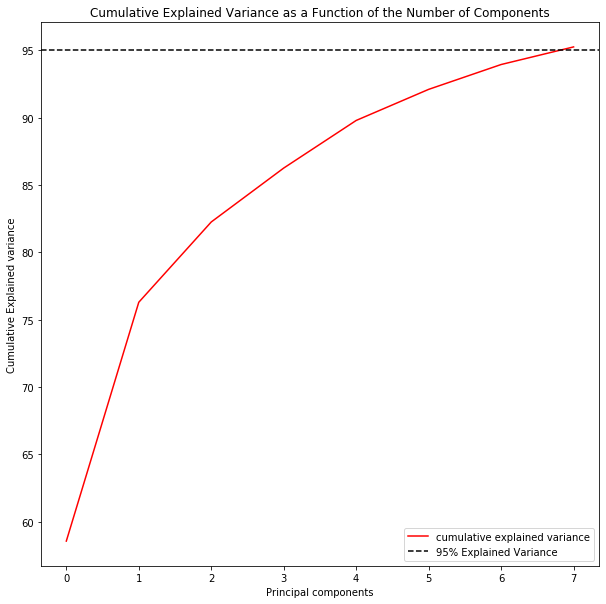

In [51]:
# plot the see the amount of principals needed to obtain 95% variance of the original dataset
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

The original dataset of 128 features can be reduced to a dataset of 7 principal components and still 95% of the variance can be explained by this model. This indicates that many of these features are correlated.

**Train model on the pca data**

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mean_squared_error(y_test, y_pred)

2300.047008746229

Unless the dimension reduction, the mse has increased with almost 1000. This indicates that there may be no cure of dimensionality. However, this is only one test case, cross-validation is for this a better representation.

**Decision Tree booster** <br/> The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

Text(0.5, 1.0, 'The evolution of the MSE according to the amount of trees.')

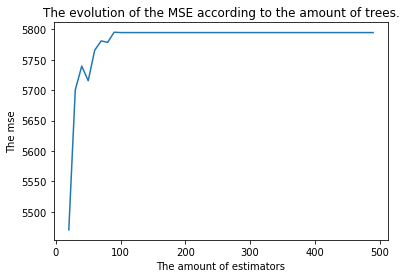

**Change the max depth of the decision tree**

In [85]:
outer_results = []
for depth in range(10, 30, 1):
    regr = AdaBoostRegressor(random_state=0, n_estimators= 100, base_estimator = DecisionTreeRegressor(random_state=0, max_depth = depth))
    results = model_selection.cross_val_score(regr, x_train, y_train, cv=kfold, scoring =  'neg_mean_squared_error')
    outer_results.append(abs(results.mean()))

Text(0.5, 1.0, 'The evolution of the MSE according to the max depth of each individual tree.')

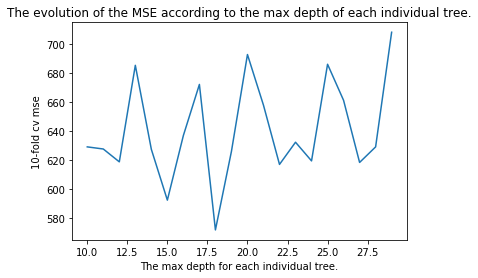

In [86]:
fig, ax = plt.subplots()
ax.plot(list(range(10, 30, 1)), outer_results)
ax.set_xlabel("The max depth for each individual tree.")
ax.set_ylabel("10-fold cv mse")
ax.set_title("The evolution of the MSE according to the max depth of each individual tree.")

**Change the amount of trees used in the booster algorithm**

In [87]:
kfold = model_selection.KFold(n_splits=10, random_state= 0)
outer_results = []
for n_ests in range(20, 500, 10):
    regr = AdaBoostRegressor(random_state=0, n_estimators=n_ests, base_estimator = DecisionTreeRegressor(random_state=0, max_depth = 17))
    results = model_selection.cross_val_score(regr, x_train, y_train, cv=kfold, scoring =  'neg_mean_squared_error')
    outer_results.append(abs(results.mean()))

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(range(20, 500, 10)), outer_results)
ax.set_xlabel("The amount of estimators")
ax.set_ylabel("The mse")
ax.set_title("The evolution of the MSE according to the amount of trees.")

**Performance on test-set**